In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/Users/willwolf/Documents/willwolf/dotify


In [4]:
# delete this eventually

import os

os.environ['SQLALCHEMY_DATABASE_URI'] = os.environ['DIGITAL_OCEAN_SQLALCHEMY_DATABASE_URI']

In [100]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sqlalchemy import create_engine

from dotify.config import DevelopmentConfig as Config
from dotify.recommendation.implicit_mf.ratings_matrix import RatingsMatrix
from dotify.recommendation.implicit_mf.implicit_mf import ImplicitMF

ENGINE = create_engine(Config.SQLALCHEMY_DATABASE_URI)

%matplotlib inline

In [7]:
ratings_matrix = RatingsMatrix(n_top_songs=10000)

In [11]:
F = 30
ALPHA = 1
LAMBDA = 25

In [18]:
implicit_mf = ImplicitMF(ratings_matrix=RatingsMatrix(), f=F, alpha=ALPHA, lmbda=LAMBDA)

In [19]:
print(implicit_mf.country_vectors.vectors.shape)
print(implicit_mf.song_vectors.vectors.shape)

(55, 30)
(25357, 30)


In [20]:
implicit_mf.run()

0
1
2
3
4
5
6
7
8
9


In [141]:
# implicit_mf.country_vectors.vectors.to_csv('data/country_vectors.csv')
# implicit_mf.song_vectors.vectors.to_csv('data/song_vectors.csv')
implicit_mf.country_vectors.vectors = pd.read_csv('data/country_vectors.csv', index_col=['country_id'])
implicit_mf.song_vectors.vectors = pd.read_csv('data/song_vectors.csv', index_col=['song_id'])

In [142]:
# make the names shorter

In [143]:
country_vectors_df = implicit_mf.country_vectors.vectors
song_vectors_df = implicit_mf.song_vectors.vectors

## Visualize

In [144]:
country_vectors_df.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_20,dim_21,dim_22,dim_23,dim_24,dim_25,dim_26,dim_27,dim_28,dim_29
country_id,,,,,,,,,,,,,,,,,,,,,
1,1.199533,0.805071,-1.701547,1.053904,0.507967,-0.842553,-0.700260,-1.435701,0.220028,-0.047097,...,2.310619,1.289404,-0.493658,0.185296,-0.611855,-2.279349,-1.221629,-2.486846,-1.509292,0.634107
2,1.657513,1.186152,1.109628,-0.539622,0.308465,-0.425653,-1.427701,-0.964977,1.845865,-1.449298,...,-0.198157,1.489509,-2.361668,0.528493,2.023884,-0.809309,0.466260,0.797203,-0.102998,0.774133
4,-0.361324,0.715569,0.095872,-0.763642,0.500045,-0.622255,0.453800,-1.494433,1.056581,0.578316,...,-0.842486,1.196757,0.780113,-1.784573,1.788248,0.490548,-1.354775,-0.643397,-0.199454,0.611466
5,0.922620,0.629252,-1.982874,-1.084756,-2.172330,-2.105921,-0.152939,0.699596,0.577632,1.760455,...,-0.363781,0.365383,-1.395616,-0.465801,-0.865641,-0.234164,0.291409,0.233215,-0.346712,1.232901
6,0.227114,0.694578,-0.146239,2.021938,0.581785,-0.909703,-1.525334,1.014610,-0.052186,-0.894440,...,-0.833079,-2.148726,-1.320359,-0.905628,0.571474,-1.350109,-0.591159,0.548953,-0.458362,0.062614


In [145]:
song_vectors_df.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_20,dim_21,dim_22,dim_23,dim_24,dim_25,dim_26,dim_27,dim_28,dim_29
song_id,,,,,,,,,,,,,,,,,,,,,
5552,-0.077041,0.108355,-0.097699,0.155515,-0.095229,0.078845,-0.051036,-0.005292,0.169841,-0.083281,...,0.023157,0.072248,0.099295,0.005338,0.044581,-0.039196,-0.018968,-0.069020,0.029930,0.157775
5553,-0.094339,0.091163,-0.075031,0.210590,-0.134693,0.045414,-0.022887,0.001569,0.086351,-0.053027,...,0.024979,0.081063,0.119719,-0.000729,0.131279,-0.077077,-0.002516,-0.073528,0.046118,0.190829
5554,-0.090403,0.091216,-0.074708,0.208312,-0.132058,0.045682,-0.024401,0.001036,0.088304,-0.052268,...,0.023591,0.081062,0.116875,-0.003208,0.128440,-0.076629,-0.004486,-0.072347,0.043577,0.188794
5555,-0.082978,0.089974,-0.073077,0.204956,-0.128832,0.044359,-0.025805,0.000604,0.089665,-0.050472,...,0.021601,0.079641,0.112784,-0.008778,0.125857,-0.076733,-0.007947,-0.070830,0.039305,0.186027
5556,-0.082901,0.090079,-0.073140,0.204917,-0.128711,0.044592,-0.026017,0.000638,0.089910,-0.050329,...,0.021550,0.079760,0.112631,-0.008716,0.125574,-0.076613,-0.008091,-0.070707,0.039274,0.185886


In [ ]:
# change countries index form id to name

In [25]:
sns.set(style="white")

In [146]:
from dotify.resources.countries import countries as countries_lookup


country_id_to_name = {countries_lookup[name]['id']: name for name in countries_lookup}


def replace_country_id_index_with_country_names(df):
    country_ids = df.index
    df.index = pd.Index([country_id_to_name[c_id] for c_id in country_ids], name='country_name')
    return df


country_ids = country_vectors_df.index
country_names = pd.Index([country_id_to_name[c_id] for c_id in country_ids], name='country_name')
country_vectors_df.index = country_names

In [147]:
def plot_cosine_similarities(country_vectors_df):

    # compute the cosine similarity matrix
    similarities_df = pd.DataFrame(
        data=cosine_similarity(country_vectors_df),
        index=country_vectors_df.index,
        columns=country_vectors_df.index
    )
    
    # generate a mask for the upper triangle
    mask = np.zeros_like(similarities_df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # set up the matplotlib figure
    f, ax = plt.subplots(figsize=(21, 21))

    # generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(similarities_df, mask=mask, cmap=cmap, vmax=.5,
                square=True, xticklabels=True, yticklabels=True,
                linewidths=1, cbar_kws={"shrink": .5}, ax=ax)

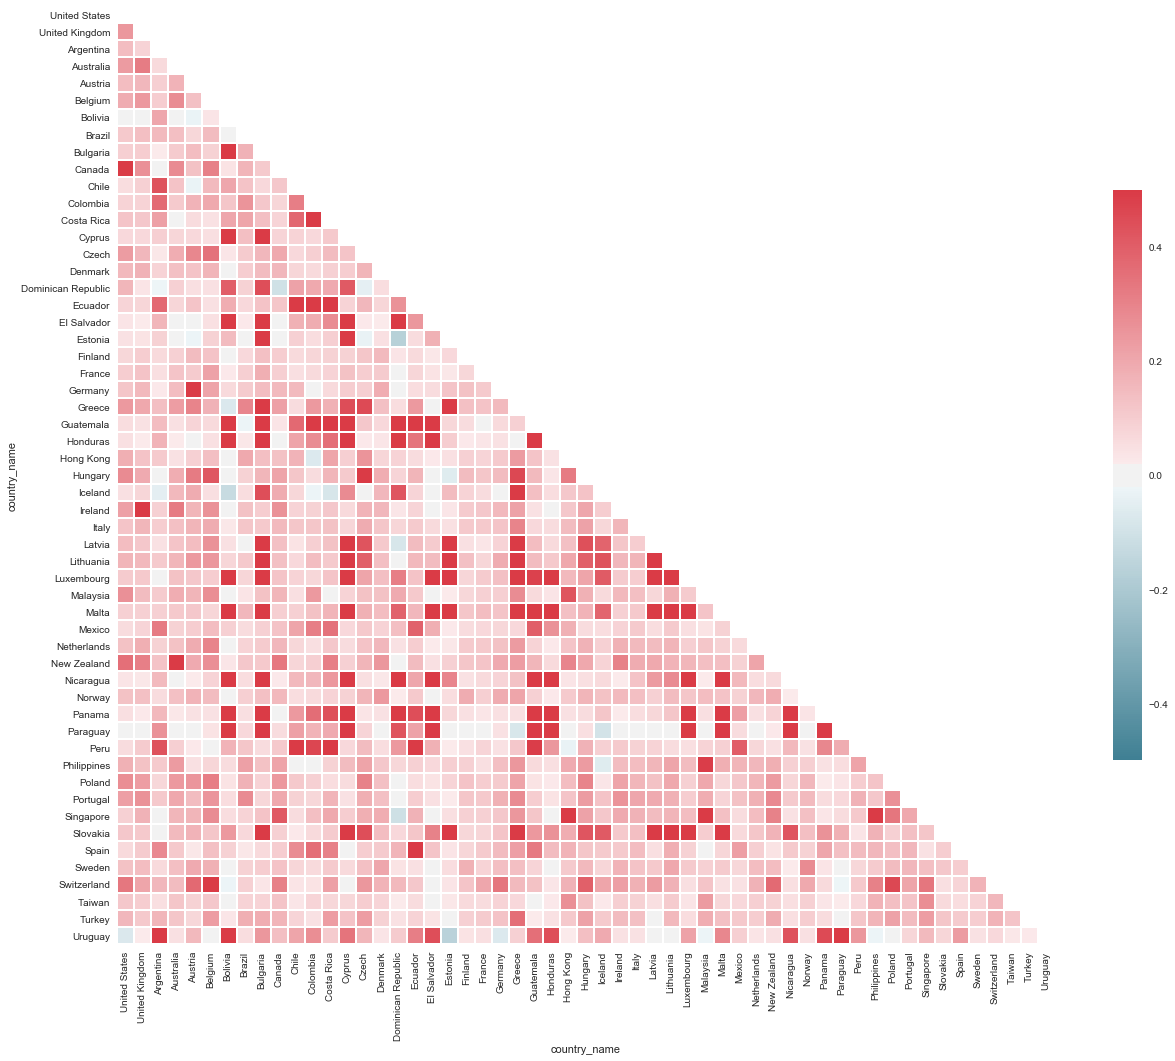

In [148]:
plot_cosine_similarities(country_vectors_df)

# tsne

In [121]:
from matplotlib import pylab
from sklearn.manifold import TSNE

In [202]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)

In [203]:
country_embeddings = pd.DataFrame(
    data=tsne.fit_transform(country_vectors_df),
    index=country_vectors_df.index,
    columns=['dim_1', 'dim_2']
)

In [204]:
def plot_tsne_embeddings(country_embeddings):

    pylab.figure(figsize=(15,15))

    for country_name, country_embedding in country_embeddings.iterrows():
        dim_1, dim_2 = country_embedding
        pylab.scatter(dim_1, dim_2)
        pylab.annotate(country_name, xy=(dim_1, dim_2), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    pylab.show()

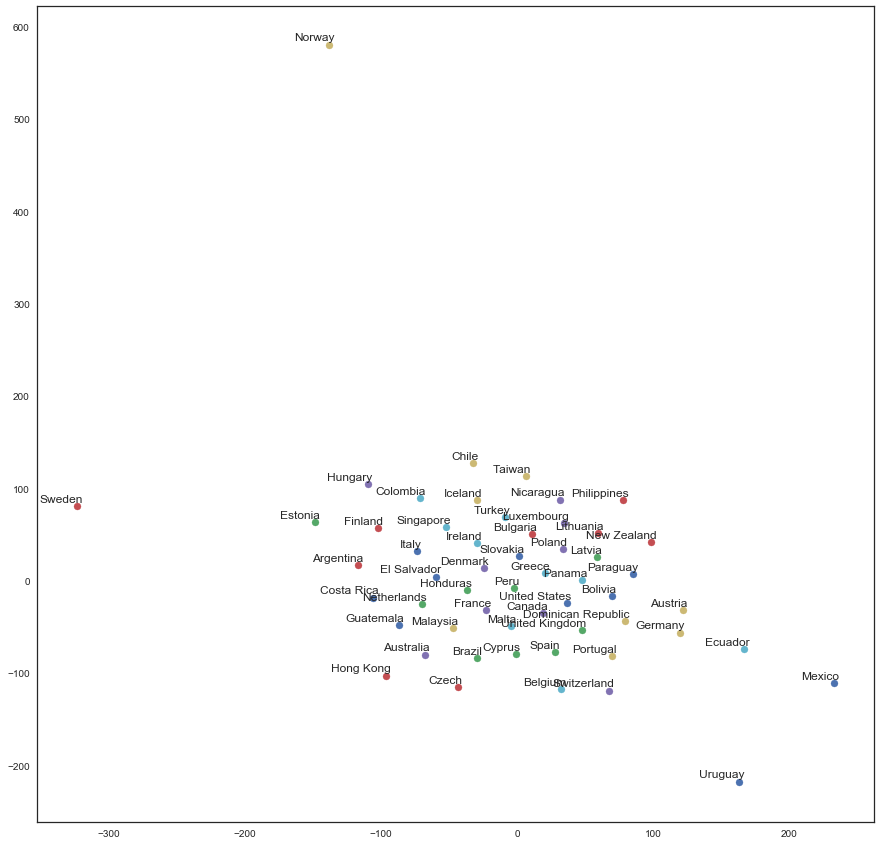

In [205]:
plot_tsne_embeddings(country_embeddings)

## Inspect arithmetic combinations

In [206]:
SONG_VECTORS_QUERY = """
    SELECT 
        songs.title as song_title, 
        songs.artist as song_artist,
        song_vectors.* 
    FROM song_vectors 
    JOIN songs ON songs.id = song_vectors.song_id
"""

song_vectors_df = pd.read_sql(SONG_VECTORS_QUERY, ENGINE, index_col=['song_title', 'song_artist'])
song_vectors_df.drop('song_id', axis=1, inplace=True)

In [207]:
country_vec = country_vectors_df.ix['United States']

In [208]:
song_vectors_df.apply(lambda vec: np.dot(vec, country_vec), axis=1).sort_values(ascending=False).head(10)

song_title                                   song_artist     
Last Christmas                               Wham!               1.579406
Bad and Boujee (feat. Lil Uzi Vert)          Migos               1.578728
It's Beginning To Look A Lot Like Christmas  Michael Bublé       1.576117
Never Be Like You                            Flume               1.574824
One Dance                                    Drake               1.569462
Same Old Love                                Selena Gomez        1.569099
Love Me Now                                  John Legend         1.569094
Closer                                       The Chainsmokers    1.569020
Starboy                                      The Weeknd          1.568927
Cold Water (feat. Justin Bieber & MØ)        Major Lazer         1.568918
dtype: float64

In [209]:
country_vec = country_vectors_df.ix['Colombia']

In [210]:
song_vectors_df.apply(lambda vec: np.dot(vec, country_vec), axis=1).sort_values(ascending=False).head(10)

song_title                      song_artist   
Dream On                        Aerosmith         0.967756
Hasta el Amanecer               Nicky Jam         0.959195
Picky                           Joey Montana      0.955909
Te Busco                        Cosculluela       0.929746
Borro Cassette                  Maluma            0.921897
Thinking About You              Calvin Harris     0.919561
Sorry - Latino Remix            Justin Bieber     0.919094
La mujer que bota fuego         Manuel Medrano    0.917795
Tienes la Sonrisa (feat. Ñejo)  Lil Silvio        0.917621
La Gozadera                     Gente De Zona     0.916844
dtype: float64

In [227]:
country_vec = country_vectors_df.ix['France']

In [228]:
song_vectors_df.apply(lambda vec: np.dot(vec, country_vec), axis=1).sort_values(ascending=False).head(10)

song_title                             song_artist     
One Dance                              Drake               1.233060
Starboy                                The Weeknd          1.231536
Cold Water (feat. Justin Bieber & MØ)  Major Lazer         1.231490
Closer                                 The Chainsmokers    1.231207
Hello                                  Adele               1.230285
Let Me Love You                        DJ Snake            1.230084
Shape of You                           Ed Sheeran          1.228130
DUELE EL CORAZON                       Enrique Iglesias    1.225462
Castle on the Hill                     Ed Sheeran          1.224931
I Took A Pill In Ibiza - Seeb Remix    Mike Posner         1.221306
dtype: float64